In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats
from numpy.random import seed
plt.style.use('bmh')

Is there a difference in mean review length (in characters) between positive reviews and negative reviews? 
- Null Hypothesis: There is no difference in mean review length class 0 and class 1
- Alternate Hypothesis: There is a difference in mean review length between the two classes
- Alpha = 0.05



In [3]:
# read in dataframe
df = pd.read_pickle('data/yelp_review1pct_business_merge.pkl')

In [4]:
# Split the dataframe into two groups, one for each Class
class0 = df[df.sentiment == 0]
class1 = df[df.sentiment == 1]

In [12]:
# calculate the observed means of the two groups and perform a t test not assuming variance is equal
mean_class0 = np.mean(class0.num_words)
mean_class1 = np.mean(class1.num_words)
tval = scipy.stats.ttest_ind(class0.num_words, class1.num_words, equal_var=False)
print(f'pvalue: {tval.pvalue:.5f}')
print(f'mean of Review Length NEGATIVE: {mean_class0:.1f}')
print(f'mean of Review Length POSITIVE: {mean_class1:.1f}')

pvalue: 0.00000
mean of Review Length NEGATIVE: 733.5
mean of Review Length POSITIVE: 515.9


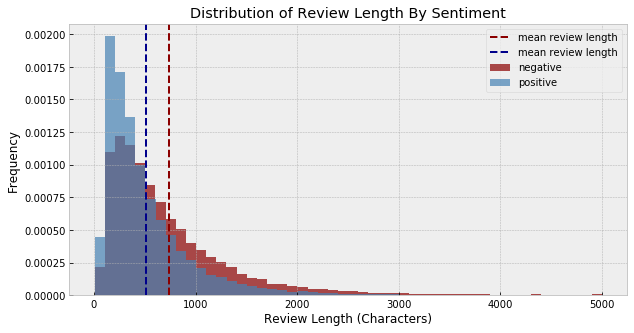

In [9]:
# visualize Distribution
x0 = df_merge.loc[df_merge.sentiment==0, 'num_words']
x1 = df_merge.loc[df_merge.sentiment==1, 'num_words']
plt.figure(figsize=(10,5))
_ = plt.hist(x0, alpha=0.7, bins=50, color='darkred', density=True, stacked=True, label='negative')
_ = plt.hist(x1, alpha=0.7, bins=50, color='steelblue', density=True, stacked=True, label='positive')
_ = plt.axvline(x0.mean(), ls='--', c='darkred', label='mean review length')
_ = plt.axvline(x1.mean(), ls='--', c='darkblue', label='mean review length')
_ = plt.xlabel('Review Length (Characters)')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of Review Length By Sentiment')
_ = plt.legend()
plt.show()

In [10]:
print(tval)

Ttest_indResult(statistic=48.757248142587294, pvalue=0.0)


- Since the p value is below the threshold of 0.05, I can reject the null hypothesis that the mean review length is not different between the two classes.
- The mean review length is significantly lower for POSITIVE reviews than it is for NEGATIVE reviews